In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from tang_jcompneuro.model_fitting_postprocess import load_data_generic

In [3]:
def modelname_alternative(model_type, model_subtype, _1, _2):
    if model_type == 'cnn':
        suffix = model_subtype.upper()
    elif model_type == 'glm':
        suffix, _ = model_subtype.split('_')
        assert _ == 'poisson'
    else:
        raise NotImplementedError
    # dollar is later used to find those relevant models.
    return f'{model_type}${suffix}'
    # well, I guess I don't need to be that fancy.
    # just manually doing it should be fine.
    # also more flexible, as I can control order more freely.
#     reutr
    

In [4]:
def check_all(squared, score_col_name):
    models_to_examine = [
        ('cnn', 'b.2'),
        ('cnn', 'b.4'),
        ('cnn', 'b.9'),
        ('glm', 'fpower_poisson'),
        ('glm', 'linear_poisson'),
#         ('glm', 'gqm.2_poisson'),
        ('glm', 'gqm.4_poisson'),
#         ('glm', 'gqm.8_poisson'),
    ]
    
    
    return load_data_generic(models_to_examine, load_naive=False, metric='ccnorm_5', squared=squared,
                             percentages_to_load=(25,50,75,100),
                            score_col_name=score_col_name, modelname_alternative=modelname_alternative)


In [5]:
df_all_cc2 = check_all(squared=True, score_col_name='cc2').sort_index()

MkA_Shape all
MkA_Shape OT
MkE2_Shape all
MkE2_Shape OT


In [6]:
HO_neuron_perf = df_all_cc2.apply(lambda x: x['cc2']['HO']['mean'], axis=1).unstack('subset').unstack('percentage')
HO_neuron_perf

subset                       OT                                     all  \
percentage                  25        50        75        100       25    
dataset    model                                                          
MkA_Shape  cnn$B.2     0.104017  0.158551  0.188308  0.209741  0.229407   
           cnn$B.4     0.108562  0.162048  0.195757  0.219618  0.254432   
           cnn$B.9     0.118001  0.172340  0.207929  0.232761  0.267652   
           glm$fpower  0.100673  0.130479  0.148314  0.158648  0.134828   
           glm$gqm.4   0.075023  0.105881  0.123371  0.128318  0.157419   
           glm$linear  0.076990  0.096391  0.108271  0.114884  0.097688   
MkE2_Shape cnn$B.2     0.094341  0.152201  0.184981  0.212439  0.204921   
           cnn$B.4     0.102042  0.161820  0.192760  0.221278  0.223114   
           cnn$B.9     0.118081  0.172046  0.202657  0.229838  0.247234   
           glm$fpower  0.083099  0.112823  0.131342  0.143874  0.112272   
           glm$gqm.4   0.057337  0.094591  0.114119  0.130375  0.140536   
           glm$linear  0.063424  0.087220  0.098613  0.105756  0.084712   

subset                                               
percentage                  50        75        100  
dataset    model                                     
MkA_Shape  cnn$B.2     0.310559  0.345792  0.364272  
           cnn$B.4     0.335229  0.379465  0.405035  
           cnn$B.9     0.357049  0.399898  0.424384  
           glm$fpower  0.163037  0.175717  0.186996  
           glm$gqm.4   0.204019  0.234464  0.255681  
           glm$linear  0.112537  0.119138  0.123476  
MkE2_Shape cnn$B.2     0.274627  0.322426  0.348592  
           cnn$B.4     0.299695  0.351961  0.378593  
           cnn$B.9     0.315327  0.367409  0.396948  
           glm$fpower  0.143134  0.165335  0.176236  
           glm$gqm.4   0.202482  0.244402  0.272207  
           glm$linear  0.107181  0.123232  0.133198

In [7]:
HO_neuron_perf.loc[('MkA_Shape', 'cnn$B.2'), ('OT',)]

percentage
25     0.104017
50     0.158551
75     0.188308
100    0.209741
Name: (MkA_Shape, cnn$B.2), dtype: float64

In [8]:
OT_neuron_perf = df_all_cc2.apply(lambda x: x['cc2']['OT']['mean'], axis=1).unstack('subset').unstack('percentage')
OT_neuron_perf

subset                       OT                                     all  \
percentage                  25        50        75        100       25    
dataset    model                                                          
MkA_Shape  cnn$B.2     0.240880  0.343378  0.396450  0.428533  0.323944   
           cnn$B.4     0.260325  0.366273  0.419854  0.450794  0.351277   
           cnn$B.9     0.280541  0.391654  0.439691  0.473150  0.375388   
           glm$fpower  0.192871  0.253554  0.279310  0.299176  0.184344   
           glm$gqm.4   0.142456  0.211021  0.255066  0.280782  0.237246   
           glm$linear  0.123533  0.153238  0.170928  0.178910  0.131899   
MkE2_Shape cnn$B.2     0.254885  0.368110  0.415449  0.461793  0.338906   
           cnn$B.4     0.275267  0.392781  0.447736  0.490762  0.373336   
           cnn$B.9     0.297708  0.413579  0.467939  0.514725  0.403283   
           glm$fpower  0.187648  0.233248  0.255482  0.289153  0.191097   
           glm$gqm.4   0.133291  0.230372  0.283719  0.308235  0.250172   
           glm$linear  0.144616  0.202244  0.225552  0.231406  0.166745   

subset                                               
percentage                  50        75        100  
dataset    model                                     
MkA_Shape  cnn$B.2     0.391766  0.422634  0.438926  
           cnn$B.4     0.419896  0.457999  0.475739  
           cnn$B.9     0.449820  0.485551  0.507491  
           glm$fpower  0.216188  0.226111  0.237842  
           glm$gqm.4   0.303456  0.335186  0.359889  
           glm$linear  0.149368  0.157957  0.164772  
MkE2_Shape cnn$B.2     0.408254  0.447121  0.465612  
           cnn$B.4     0.445408  0.485768  0.507013  
           cnn$B.9     0.473757  0.518414  0.540943  
           glm$fpower  0.215353  0.241528  0.250836  
           glm$gqm.4   0.352927  0.405712  0.433565  
           glm$linear  0.198823  0.220689  0.232404

In [9]:
from tang_jcompneuro.plotting import image_subset_and_neuron_subset_list, show_perf_vs_size
from tang_jcompneuro import dir_dictionary
import os.path

In [10]:
from collections import OrderedDict

In [11]:
def define_data_meta():
    data_groups_this = OrderedDict()
    data_groups_this['cnn.B.2'] = ('cnn$B.2', '-', '#1f77b4', 'x')
    data_groups_this['cnn.B.4'] = ('cnn$B.4', '-', '#ff7f0e', 'x')
    data_groups_this['cnn.B.9'] = ('cnn$B.9', '-', '#2ca02c', 'x')
    data_groups_this['glm.fpower'] = ('glm$fpower', '--', '#1f77b4', 'x')
    data_groups_this['glm.linear'] = ('glm$linear', '--', '#ff7f0e', 'x')
    data_groups_this['glm.gqm.4'] = ('glm$gqm.4', '--', '#2ca02c', 'x')
    return data_groups_this

In [12]:
# time to plot.
# magic numbers here follow
# https://github.com/leelabcnbc/tang_jcompneuro/blob/master/thesis_plots/v1_fitting/results_glm_opt_detailed.ipynb
def draw_one_stuff(dataset):
    # draw one by one.
    
    num_panel = len(image_subset_and_neuron_subset_list)
    
    plt.close('all')
    fig, axes = plt.subplots(1, num_panel, sharex=False, sharey=True, squeeze=False,
                            figsize=(5.5,2.5))
    for idx, (ax, (img_subset, neuron_subset)) in enumerate(zip(axes.ravel(), image_subset_and_neuron_subset_list)):
#         print(idx)
#         if neuron_subset == 'OT':
#             data_y = OT_neuron_perf.loc[(dataset, ), (img_subset,)].values
#             data_x = OT_neuron_perf.loc[(dataset, ), (img_subset,)].index.values
#         elif neuron_subset == 'HO':
#             data_y = HO_neuron_perf.loc[(dataset, ), (img_subset,)].values
#             data_x = HO_neuron_perf.loc[(dataset, ), (img_subset,)].index.values
#         else:
#             raise NotImplementedError
#         assert data_y.shape == (14,)
#         data_x = np.array([compute_num_params(x) for x in data_x])
#         assert np.array_equal(data_x, np.sort(data_x))
#         assert data_x.shape == data_y.shape == (data_x.size,)
#         #print(data_x)
#         # color
        # https://matplotlib.org/users/dflt_style_changes.html#colors-color-cycles-and-color-maps
    
        # collect data
        labels = []
        xdatas = []
        ydatas = []
        style_list = []
        for label_name, (model_name, *style) in define_data_meta().items():
            labels.append(label_name)
            style_list.append(tuple(style))
            
            if neuron_subset == 'OT':
                data_y = OT_neuron_perf.loc[(dataset, model_name), (img_subset,)].values
                data_x = OT_neuron_perf.loc[(dataset, model_name), (img_subset,)].index.values
            elif neuron_subset == 'HO':
                data_y = HO_neuron_perf.loc[(dataset, model_name), (img_subset,)].values
                data_x = HO_neuron_perf.loc[(dataset, model_name), (img_subset,)].index.values
            else:
                raise NotImplementedError
            assert data_y.shape == (4,)
            assert np.array_equal(data_x, np.sort(data_x))
            assert data_x.shape == data_y.shape == (data_x.size,)
            xdatas.append(data_x)
            ydatas.append(data_y)
    
        show_perf_vs_size(xdatas, ydatas, labels,
                          title=f'{neuron_subset} neurons\n{img_subset} stimuli',
                          ax=ax, xlabel='% of training data',
                          ylabel='mean $CC_\mathrm{norm}^2$' if idx == 0 else None,
                         style_list=style_list, show_legend=True,
                          xticks=(0, 25, 50, 75,) if idx != num_panel-1 else (0, 25, 50, 75, 100),
                          xticklabels=('0', '25', '50', '75') if idx != num_panel-1 else ('0', '25', '50', '75','100'),
                          legend_param=dict(loc='best', ncol=2, fontsize='xx-small', columnspacing=0)
        )
    mk = {'MkA_Shape': 'A', 'MkE2_Shape': 'B'}[dataset]
    fig.suptitle(f'model performance vs. % of training data on monkey {mk}')
    # adjust figure 
#     fig.subplots_adjust(top=0.7, bottom=0.2, left=0.11, right=1, hspace=0.1, wspace=0.05)
    fig.subplots_adjust(top=0.7, bottom=0.2, left=0.11, right=0.96, hspace=0.1, wspace=0.075)
    save_dir = os.path.join(dir_dictionary['plots'], 'supp', 'performance_vs_training_data')
    os.makedirs(save_dir, exist_ok=True)
    fig.savefig(os.path.join(save_dir, f'perf_vs_training_size_{dataset}.pdf'), dpi=300)
    
    plt.show()

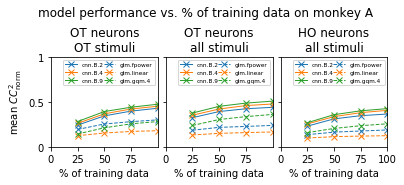

In [13]:
draw_one_stuff('MkA_Shape')

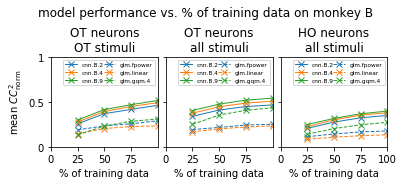

In [14]:
draw_one_stuff('MkE2_Shape')